In [1]:
import matplotlib.pyplot as pyplot
from math import log, exp

In [2]:
pointsFile = open("covid1.csv", 'r')
lines = []

for line in pointsFile:
    line = line.strip()
    line = line.split(',')
    lines.append(line)

activeCases = []
sumOfDeaths = []
sumOfRecoveries = []
# print(lines[0])

for line in lines:
    sumOfDeaths.append(line[7])
    activeCases.append(line[-1])
    sumOfRecoveries.append(line[8])

activeCases = activeCases[-100:]
sumOfDeaths = sumOfDeaths[-100:]
sumOfRecoveries = sumOfRecoveries[-100:]

deathToRecoveryRatio = sumOfDeaths[:]

for i in range(len(sumOfRecoveries)):
    deathToRecoveryRatio[i] = float(deathToRecoveryRatio[i]) / float(sumOfRecoveries[i])

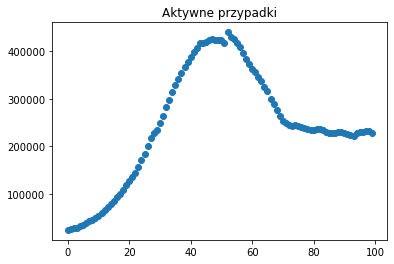

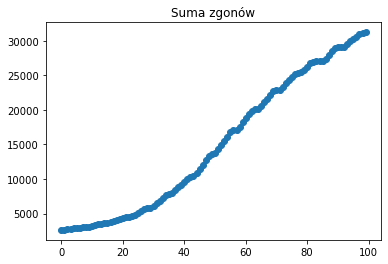

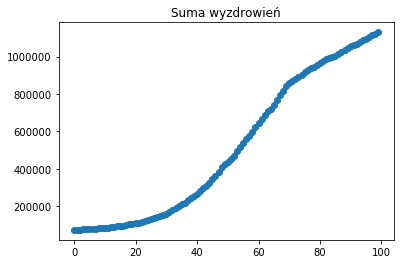

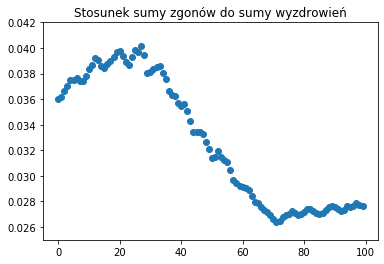

In [3]:
days = [i for i in range(len(activeCases))]
activeCases = [float(point) for point in activeCases]
sumOfDeaths = [float(point) for point in sumOfDeaths]
sumOfRecoveries = [float(point) for point in sumOfRecoveries]

pyplot.scatter(days, activeCases)
pyplot.title("Aktywne przypadki")
pyplot.show()
pyplot.title("Suma zgonów")
pyplot.scatter(days, sumOfDeaths)
pyplot.show()
pyplot.title("Suma wyzdrowień")
pyplot.scatter(days, sumOfRecoveries)
pyplot.show()
pyplot.title("Stosunek sumy zgonów do sumy wyzdrowień")
pyplot.scatter(days, deathToRecoveryRatio)
pyplot.ylim(0.025,0.042)
pyplot.show()

In [4]:
def map_list(f, x): 
    return list(map(f,x))

def diff_quot(x, f):
    n = len(x) - 1
    result = map_list(f, x)
    for i in range(1, n+1):
        for j in range(n, i-1, -1):
            result[j] = (result[j] - result[j - 1]) / ( x[j] - x[j-i] )
    return result

In [5]:
def aux(t):
    return Y[days.index(t)]

In [6]:
#źródło kodu: https://www.python-course.eu/python3_memoization.php

class Memoize:

    def __init__(self, fn):
        self.fn = fn
        self.memo = {}

    def __call__(self, *args):
        if args not in self.memo:
            self.memo[args] = self.fn(*args)
        return self.memo[args]

In [7]:
@Memoize
def dotProduct(f, g):
    s = 0
    for x in X:
        s += f(x) * g(x)
    return s

In [8]:
def c(k):
    return dotProduct(lambda y : y * P(k - 1)(y), P(k - 1)) / dotProduct(P(k - 1), P(k - 1))

In [9]:
def d(k):
    return dotProduct(P(k - 1), P(k - 1)) / dotProduct(P(k - 2), P(k - 2))

In [10]:
@Memoize
def auxP(x, k):
    if k == 0:
        return 1
    if k == 1:
        return x - c(1)
    return (x - c(k)) * auxP(x, k - 1) - d(k) * auxP(x, k - 2)

def P(k):
    return lambda x : auxP(x, k)

In [11]:
def a(k):
    return dotProduct(aux, P(k)) / dotProduct(P(k), P(k))

def auxW(x, m):
    w = 0
    for i in range(m + 1):
        w += a(i) * P(i)(x)
    return w

def W(m):
    return lambda x : auxW(x, m)

In [12]:
if activeCases[0] == 0:  
    logActiveCases = [0]
else:
    logActiveCases = [log(activeCases[0])]
for numberOfCases in activeCases[1:]:
    logActiveCases.append(log(numberOfCases))

if sumOfDeaths[0] == 0:  
    logSumOfDeaths = [0]
else:
    logSumOfDeaths = [log(sumOfDeaths[0])]
for element in sumOfDeaths[1:]:
    logSumOfDeaths.append(log(element))

if sumOfRecoveries[0] == 0:  
    logSumOfRecoveries = [0]
else:
    logSumOfRecoveries = [log(sumOfRecoveries[0])]
for element in sumOfRecoveries[1:]:
    logSumOfRecoveries.append(log(element))

if deathToRecoveryRatio[0] == 0:  
    logDeathToRecoveryRatio = [0]
else:
    logDeathToRecoveryRatio = [log(deathToRecoveryRatio[0])]
for element in deathToRecoveryRatio[1:]:
    logDeathToRecoveryRatio.append(log(element))


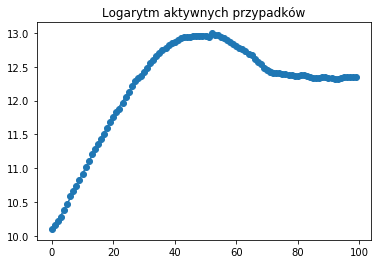

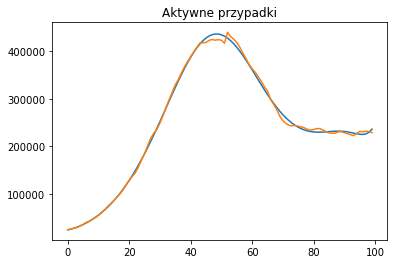

In [13]:
Y = logActiveCases
X = range(len(Y))

wValues = [W(10)(d) for d in days]
pyplot.scatter(days, Y)
pyplot.plot(days, wValues)
pyplot.title("Logarytm aktywnych przypadków")
pyplot.show()

expY = [exp(value) for value in wValues]

pyplot.title("Aktywne przypadki")
pyplot.plot(days, expY)
pyplot.plot(days, activeCases)
pyplot.show()

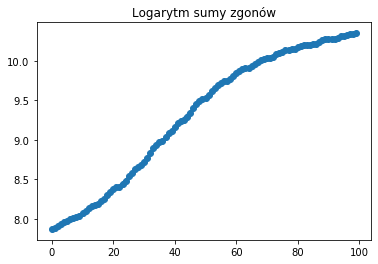

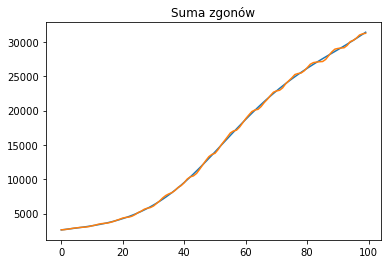

In [14]:
Y = logSumOfDeaths
wValues = [W(10)(d) for d in days]
pyplot.scatter(days, Y)
pyplot.plot(days, wValues)
pyplot.title("Logarytm sumy zgonów")
pyplot.show()

expY = [exp(value) for value in wValues]


pyplot.title("Suma zgonów")
pyplot.plot(days, expY)
pyplot.plot(days, sumOfDeaths)
pyplot.show()

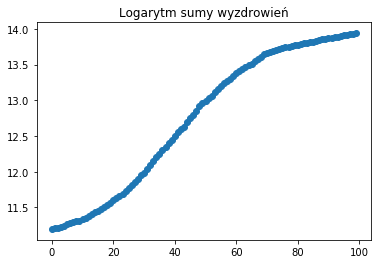

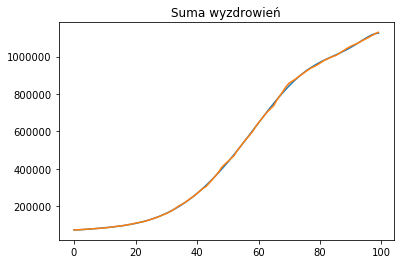

In [15]:
Y = logSumOfRecoveries
X = range(len(Y))

wValues = [W(10)(d) for d in days]
pyplot.scatter(days, Y)
pyplot.plot(days, wValues)
pyplot.title("Logarytm sumy wyzdrowień")
pyplot.show()

expY = [exp(value) for value in wValues]

pyplot.title("Suma wyzdrowień")
pyplot.plot(days, expY)
pyplot.plot(days, sumOfRecoveries)
pyplot.show()

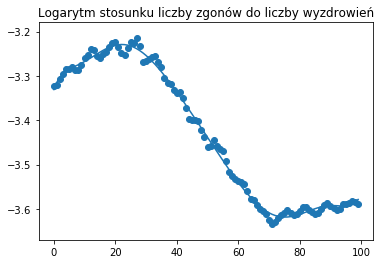

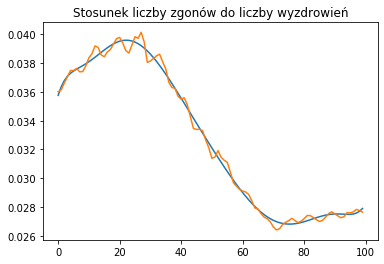

In [16]:
Y = logDeathToRecoveryRatio
X = range(len(Y))

wValues = [W(10)(d) for d in days]
pyplot.scatter(days, Y)
pyplot.plot(days, wValues)
pyplot.title("Logarytm stosunku liczby zgonów do liczby wyzdrowień")
pyplot.show()

expY = [exp(value) for value in wValues]

pyplot.title("Stosunek liczby zgonów do liczby wyzdrowień")
pyplot.plot(days, expY)
pyplot.plot(days, deathToRecoveryRatio)
pyplot.show()